In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
import math
import os
import csv
from soundsig.sound import WavFile, BioSound

In [11]:
INPUT_FOLDER = "VocExtracts"
filename = "DeSa_200123_0958_voc_1_102394334.wav_Bat14461_AL16_Elmt1_Piezo.wav"
batName = filename[37:45]

In [12]:
WAVE_KEY = "Piezo_wave"
FS_KEY = "Piezo_FS"
START_KEY = "IndVocStartPiezo"
STOP_KEY = "IndVocStopPiezo"
SR = 50000 # Sampling rate in Hz. Actual logger sampling rates can vary by +-2 Hz
TEST_PATH = "./data/test/"
TRAIN_PATH = "./data/train/"
WIN = 100 # Window length in ms
FMIN = 100 # Min frequency in Hz
FMAX = 5000 # Max frequency in Hz
FREQ_SPACING = 100 # Spectogram param, 73 for CRNN, 100 (default) for Protonet & ResNet, 146 for GoogLeNet

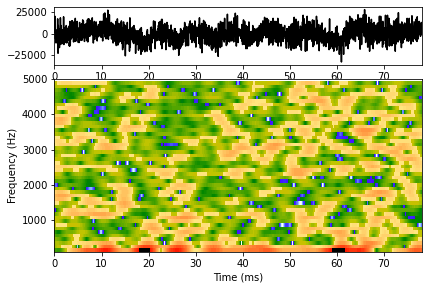

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 432x288 with 0 Axes>

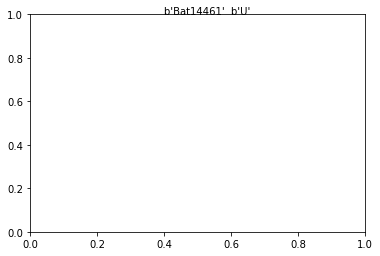

In [13]:
soundIn = WavFile(file_name=os.path.join(INPUT_FOLDER, filename))

myBioSound = BioSound(
    soundWave=soundIn.data.astype(float),
    fs=float(soundIn.sample_rate),
    emitter=batName,
)

myBioSound.spectroCalc(
    spec_sample_rate=SR,
    freq_spacing=FREQ_SPACING,
    min_freq=FMIN,
    max_freq=FMAX
)
myBioSound.rms = myBioSound.sound.std()
myBioSound.plot(DBNOISE=50, f_low=FMIN, f_high=FMAX) 